# Coding Assigment
First of all let us import all libraries:

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import functions as f            #our functions.py
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold as SKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn import svm

%matplotlib inline
%load_ext autoreload

file = Path.cwd().joinpath('HW2_data.csv') # concatenates HW2_data.csv to the current folder that should be the extracted zip folder 
dataset = pd.read_csv(file)  # load the data and drop the first row that was filled with nans

random.seed(149) #our random seed
dataset.head(10) #visualise file

,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
0,45,Male,No,No,No,Yes,No,No,No,Yes,No,No,Yes,No,Yes,No,Negative,0
1,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Negative,0
2,45,Male,Yes,Yes,No,Yes,No,Yes,No,No,No,Yes,No,No,Yes,No,Positive,0
3,59,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Positive,1
4,40,Female,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Positive,0
5,72,Male,Yes,No,No,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Negative,0
6,43,Male,No,No,No,Yes,No,Yes,No,Yes,No,Yes,No,No,Yes,No,Negative,1
7,57,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,No,No,No,Positive,0
8,37,Male,No,No,No,Yes,No,No,No,No,No,Yes,No,No,Yes,No,Positive,1
9,56,Male,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Positive,1


Here we wanted to know some info about our data:

In [2]:
dataset = dataset.interpolate()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  565 non-null    int64 
 1   Gender               565 non-null    object
 2   Increased Urination  565 non-null    object
 3   Increased Thirst     545 non-null    object
 4   Sudden Weight Loss   556 non-null    object
 5   Weakness             565 non-null    object
 6   Increased Hunger     552 non-null    object
 7   Genital Thrush       551 non-null    object
 8   Visual Blurring      565 non-null    object
 9   Itching              554 non-null    object
 10  Irritability         565 non-null    object
 11  Delayed Healing      565 non-null    object
 12  Partial Paresis      565 non-null    object
 13  Muscle Stiffness     550 non-null    object
 14  Hair Loss            565 non-null    object
 15  Obesity              565 non-null    object
 16  Diagnosi

Here we wanted to calculate what is a percentage of NaN values in a dataset:

In [3]:
df = dataset.copy()
df = df.replace('Female',0).replace('Male',1).replace('No',0).replace('Yes',1).replace('Positive',1).replace('Negative',0)
isna = np.zeros(len(df.keys()))
percent_nan = np.zeros(len(df.keys()))
for i,feat in enumerate(df.keys()):
    isna[i] = df[feat].isna().sum()
    percent_nan[i] = 100*(isna[i]/len(df[feat]))
    print('NAN pecent in feature {}  =  {:.02f}%'.format(feat,percent_nan[i]))

NAN pecent in feature Age  =  0.00%
NAN pecent in feature Gender  =  0.00%
NAN pecent in feature Increased Urination  =  0.00%
NAN pecent in feature Increased Thirst  =  3.54%
NAN pecent in feature Sudden Weight Loss  =  1.59%
NAN pecent in feature Weakness  =  0.00%
NAN pecent in feature Increased Hunger  =  2.30%
NAN pecent in feature Genital Thrush  =  2.48%
NAN pecent in feature Visual Blurring  =  0.00%
NAN pecent in feature Itching  =  1.95%
NAN pecent in feature Irritability  =  0.00%
NAN pecent in feature Delayed Healing  =  0.00%
NAN pecent in feature Partial Paresis  =  0.00%
NAN pecent in feature Muscle Stiffness  =  2.65%
NAN pecent in feature Hair Loss  =  0.00%
NAN pecent in feature Obesity  =  0.00%
NAN pecent in feature Diagnosis  =  0.00%
NAN pecent in feature Family History  =  0.00%


So we can see that the NaN values take less than 4% of the data in each feature, so we can drop the NaN's and it will have little effect on a future analysis.
In addition, we wanted to make dataset become binary, to easier analysis and visualisation.

In [4]:
def make_data_binary(data):
    binary = data.copy()
    ''' 
    We have changed the values from string to the binary ones, it will be easier for us 
    to work with the data.
    Female = 0, Male = 1.
    Yes = 1, No = 0
    Positive = 1, Negative = 0
    '''
    binary = binary.replace('Female',0).replace('Male',1).replace('No',0).replace('Yes',1).replace('Positive',1).replace('Negative',0)
    return binary.dropna() #we see in the data we have nan values. We have dropped them.

data = make_data_binary(dataset)
diag_state = data[["Diagnosis"]]
data.head(10) #visualize data after binarization

,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
0,45,1,0,0.0,0.0,1,0.0,0.0,0,1.0,0,0,1,0.0,1,0,0,0
1,42,1,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0.0,1,0,0,0
2,45,1,1,1.0,0.0,1,0.0,1.0,0,0.0,0,1,0,0.0,1,0,1,0
3,59,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0.0,0,0,1,1
4,40,0,1,1.0,1.0,1,0.0,0.0,1,1.0,0,0,1,1.0,0,0,1,0
5,72,1,1,0.0,0.0,0,1.0,0.0,1,1.0,0,1,1,1.0,1,0,0,0
6,43,1,0,0.0,0.0,1,0.0,1.0,0,1.0,0,1,0,0.0,1,0,0,1
7,57,1,1,1.0,1.0,1,1.0,0.0,1,0.0,0,0,1,0.0,0,0,1,0
8,37,1,0,0.0,0.0,1,0.0,0.0,0,0.0,0,1,0,0.0,1,0,1,1
9,56,1,1,0.0,1.0,1,0.0,1.0,0,1.0,1,0,0,0.0,1,0,1,1


Here we wanted to show that our data labels are not equal by it amount, so we will need to do the stratification, when we will split the data to train and test.

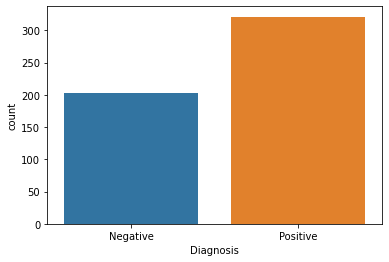

Negative samples account for 38.62% of the data.
Positive samples account for 61.38% of the data.


In [5]:

g = sns.countplot(x = 'Diagnosis', data = diag_state)
g.set(xticklabels=['Negative','Positive'])
plt.show()
idx_1 = (diag_state == 1).index[(diag_state == 1)['Diagnosis'] == True].tolist() # positive
idx_2 = (diag_state == 0).index[(diag_state == 0)['Diagnosis'] == True].tolist() # negative
print("Negative samples account for " + str("{0:.2f}".format(100 * len(idx_2) / len(diag_state))) + "% of the data.")
print("Positive samples account for " + str("{0:.2f}".format(100 * len(idx_1) / len(diag_state))) + "% of the data.")

Let us show to you distribution of the labels vs Age. We can see that there are more positive persons at the age > 75, and < 25.

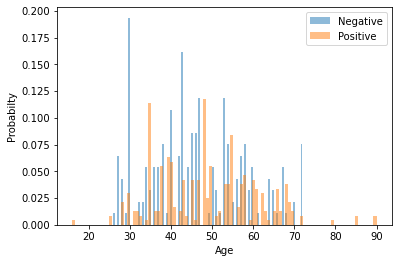

In [6]:
bins = 100
feat = 'Age'
plt.hist(dataset[feat].loc[idx_2], bins, density=True, alpha=0.5, label='Negative')
plt.hist(dataset[feat].loc[idx_1], bins, density=True, alpha=0.5, label='Positive')
plt.xlabel('Age')
plt.ylabel('Probabilty')
plt.legend(loc='upper right')
plt.show()

It was a bit strange for us, and we decided to look at the same correlation but for different Genders:

C:\Users\Valeriia Kravchik\anaconda3\envs\bm-336546-hw2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Valeriia Kravchik\anaconda3\envs\bm-336546-hw2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Valeriia Kravchik\anaconda3\envs\bm-336546-hw2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

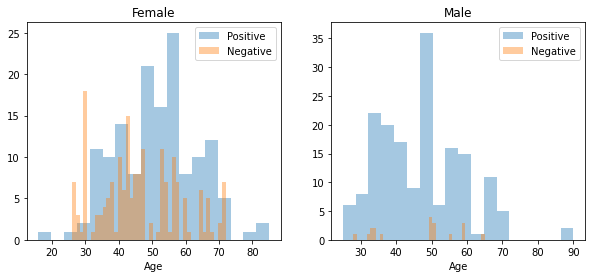

In [7]:
Positive = 'Positive'
Negative = 'Negative'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = data[data['Gender']==1]
men = data[data['Gender']==0]
ax = sns.distplot(women[women['Diagnosis']==1].Age.dropna(), bins=18, label = Positive, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Diagnosis']==0].Age.dropna(), bins=40, label = Negative, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Diagnosis']==1].Age.dropna(), bins=18, label = Positive, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Diagnosis']==0].Age.dropna(), bins=40, label = Negative, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

And we saw that so many male persons have a T1D, comparing with helthy ones. It shows us that dataset is not so balanced.
In the next section we wanted to show the relationships between features and labels.

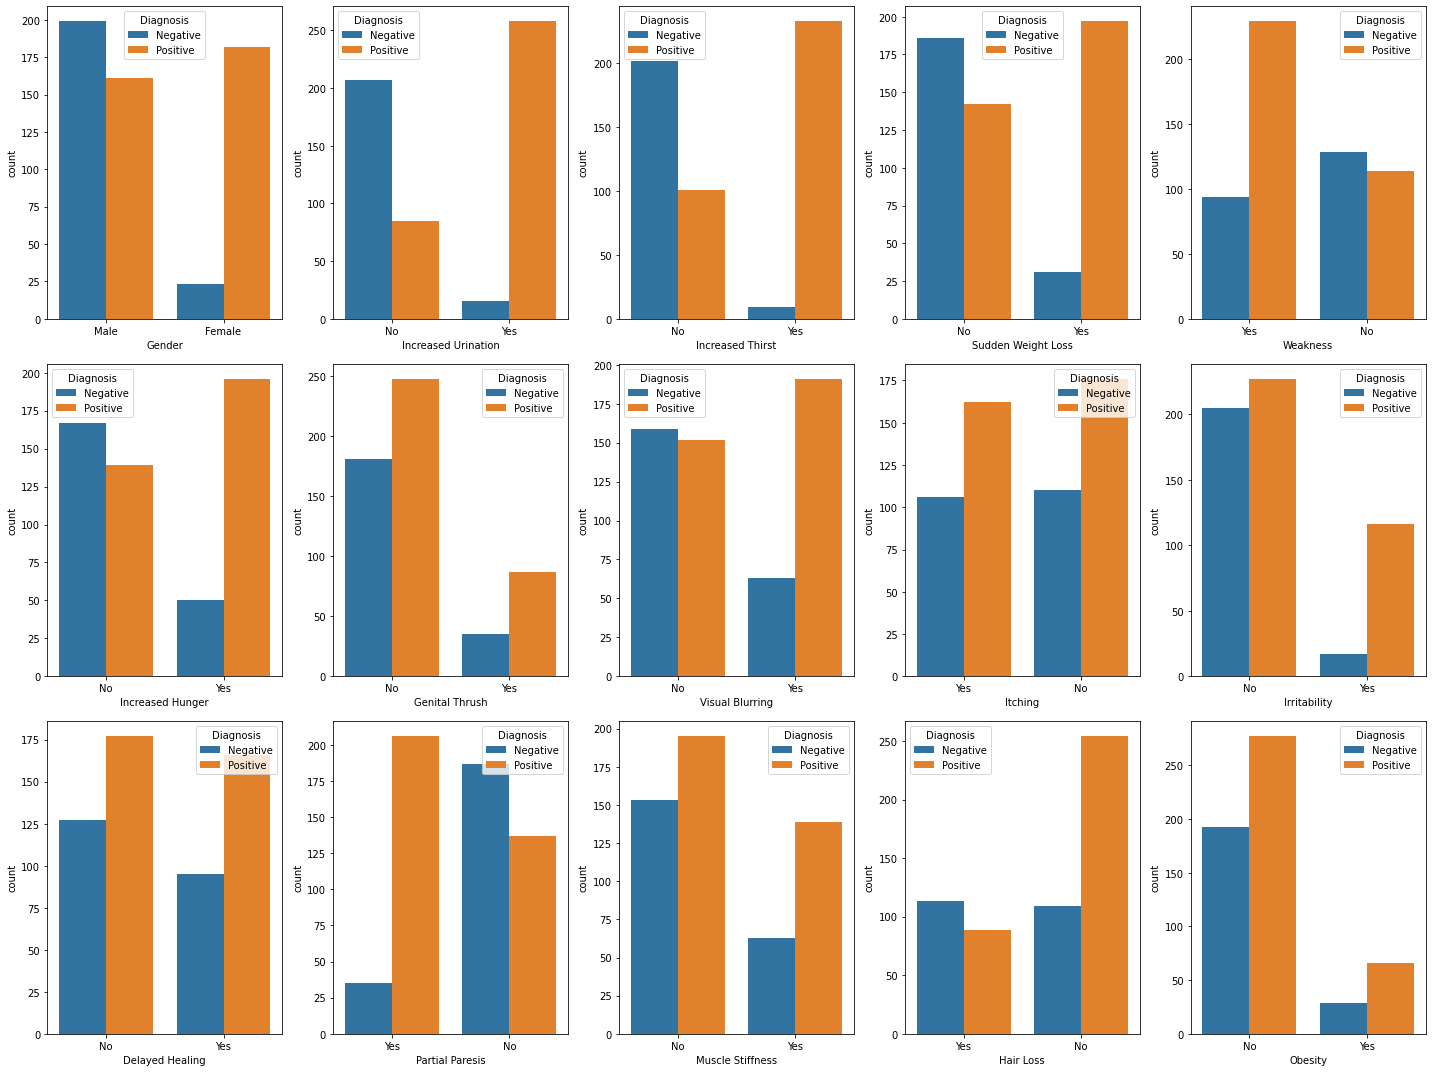

In [8]:
fig, axs = plt.subplots(3,5, figsize=(20,15))
axs = axs.ravel()
for i, feat in enumerate(dataset.keys()):
    if feat== 'Age' or feat =='Diagnosis' or feat == 'Family History': 
        continue
    sns.countplot(x = dataset[feat], hue = dataset['Diagnosis'], ax = axs[i-1])
plt.tight_layout()
plt.show()

From the countplots above we can say that the most important features are Increased Urination and Increased Thirst, because in this features we can pretty good distinguish betwen Negative and Positive Diagnosis when we have or have not each of the features symptoms. 

C:\Users\Valeriia Kravchik\anaconda3\envs\bm-336546-hw2\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


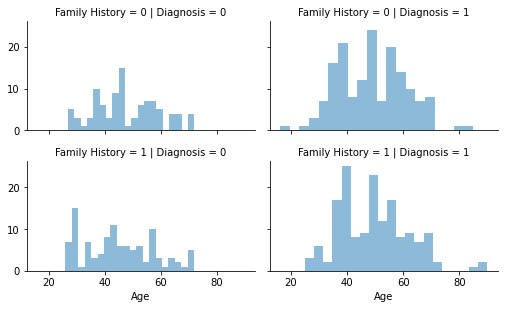

In [9]:
grid = sns.FacetGrid(data, col='Diagnosis', row='Family History', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

For instance in this graph we can see good binary separation for Weakness:

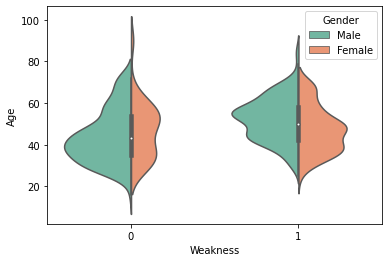

In [10]:
ax = sns.violinplot(x=data['Weakness'], y=data['Age'], hue="Gender",
                    data=dataset, palette="Set2", split=True,
                    scale="count")

Let us make a spliting:

In [11]:
orig_feat = data.columns.values.tolist()
orig_feat.remove('Diagnosis')
X_train, X_test, y_train, y_test = train_test_split(data, np.ravel(diag_state), test_size=0.2, random_state=10, stratify=np.ravel(diag_state))                                           

Here we wanted to show the table (but in our case it is data frame) which shows distribution between each feature label in Train and Test Sets.

In [12]:
features = dataset.keys().tolist()
percent_train,feat = f.find_distribution(X_train,features)
percent_test,_ = f.find_distribution(X_test,features)
delta = -(percent_test-percent_train)
a = np.array([percent_train,percent_test,delta]).T

distribution = pd.DataFrame(a,columns = ['Train%','Test%','Delta%'], index = feat )
distribution.head(16)

,Train%,Test%,Delta%
Gender,61.483254,69.523810,-8.040556
Increased Urination,50.478469,45.714286,4.764183
Increased Thirst,46.172249,38.095238,8.077011
Sudden Weight Loss,41.626794,40.952381,0.674413
Weakness,58.133971,60.000000,-1.866029
Increased Hunger,46.650718,40.952381,5.698337
Genital Thrush,20.334928,29.523810,-9.188881
Visual Blurring,45.933014,39.047619,6.885395
Itching,49.521531,44.761905,4.759626
Irritability,24.641148,22.857143,1.784005


Let us encode the data to onehot vector, using sklearn.
And doing the scaling for the Age only, using the equation: $\displaystyle \frac{Age - \mu}{\sigma}$

In [13]:
# Categorical boolean mask
categorical_feature_mask = dataset.dtypes==object 
# filter categorical columns using mask and turn it into a list
categorical_cols = dataset.dropna().columns[categorical_feature_mask].tolist() #drop nan's
# instantiate labelencoder object
le = LabelEncoder()
d = dataset.dropna().copy() #drop nan's
# apply le on categorical feature columns
d[categorical_cols] = d[categorical_cols].apply(lambda col: le.fit_transform(col.astype(str)))
# instantiate OneHotEncoder
ohe = OneHotEncoder( sparse=False ) 
# apply OneHotEncoder on categorical feature columns
X_ohe = ohe.fit_transform(d.drop('Age', axis=1).drop('Diagnosis',axis = 1)) # drop Age and Diagnosis
'''
Here we wanted to do scaling for our data. But because the most of the data is binary, we do not need to scale it,
but the Age, are not binary, so let us scale it, using the formula described in Markdown above.
'''
dd = dataset.dropna()['Age'].values
dd = np.reshape(dd,(1, dd.size))
X_ohe = np.concatenate((dd.T,X_ohe), axis = 1)
Age =  X_ohe[:,0]
mu = np.mean(Age)
std = np.std(Age)
Age -=mu
Age/=std
age = np.array([Age])
X2 = np.concatenate((age.T, X_ohe[:,1:-1]),axis=1) # this is the new OneHot Vector, with scaled Age for all the features

Let us split the data again, using the scaled data and onehot vector

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X2, d['Diagnosis'], test_size=0.2, random_state=10, stratify =d['Diagnosis'] )

Here we wil use 5k cross fold validation to train the models, using Logistic Regression. We will look for the highest test AUC.

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear, roc_auc=(train=0.500, test=0.500), total=   0.0s
[CV] classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear, roc_auc=(train=0.500, test=0.500), total=   0.0s
[CV] classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear, roc_auc=(train=0.500, test=0.500), total=   0.0s
[CV] classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  classifier=LogisticRegression(), classifier__C=1, classifier__penalty=l2, classifier__solver=liblinear, roc_auc=(train=0.980, test=0.989), total=   0.0s
[CV] classifier=LogisticRegression(), classifier__C=1, classifier__penalty=l2, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(), classifier__C=1, classifier__penalty=l2, classifier__solver=liblinear, roc_auc=(train=0.982, test=0.979), total=   0.0s
[CV] classifier=LogisticRegression(), classifier__C=10, classifier__penalty=l1, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(), classifier__C=10, classifier__penalty=l1, classifier__solver=liblinear, roc_auc=(train=0.993, test=0.915), total=   0.0s
[CV] classifier=LogisticRegression(), classifier__C=10, classifier__penalty=l1, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(), classifier__C=10, classifier__penalty=l1, classifier__solver=liblinear, roc_auc=(train=0.982, test=0.977), total=   0.0s
[CV] classifier=LogisticRegressio

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  classifier=LogisticRegression(C=1, solver='liblinear'), classifier__C=0.1, classifier__penalty=l1, classifier__solver=liblinear, roc_auc=(train=0.966, test=0.992), total=   0.0s
[CV] classifier=LogisticRegression(C=1, solver='liblinear'), classifier__C=0.1, classifier__penalty=l1, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(C=1, solver='liblinear'), classifier__C=0.1, classifier__penalty=l1, classifier__solver=liblinear, roc_auc=(train=0.970, test=0.976), total=   0.0s
[CV] classifier=LogisticRegression(C=1, solver='liblinear'), classifier__C=0.1, classifier__penalty=l1, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(C=1, solver='liblinear'), classifier__C=0.1, classifier__penalty=l1, classifier__solver=liblinear, roc_auc=(train=0.966, test=0.970), total=   0.0s
[CV] classifier=LogisticRegression(C=1, solver='liblinear'), classifier__C=0.1, classifier__penalty=l1, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(C=1, solve

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] classifier=LogisticRegression(C=0.1, solver='liblinear'), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(C=0.1, solver='liblinear'), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear, roc_auc=(train=0.500, test=0.500), total=   0.0s
[CV] classifier=LogisticRegression(C=0.1, solver='liblinear'), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(C=0.1, solver='liblinear'), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear, roc_auc=(train=0.500, test=0.500), total=   0.0s
[CV] classifier=LogisticRegression(C=0.1, solver='liblinear'), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(C=0.1, solver='liblinear'), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear, roc_auc=(t

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  classifier=LogisticRegression(C=1, penalty='l1', solver='liblinear'), classifier__C=0.01, classifier__penalty=l2, classifier__solver=liblinear, roc_auc=(train=0.964, test=0.942), total=   0.0s
[CV] classifier=LogisticRegression(C=1, penalty='l1', solver='liblinear'), classifier__C=0.1, classifier__penalty=l1, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(C=1, penalty='l1', solver='liblinear'), classifier__C=0.1, classifier__penalty=l1, classifier__solver=liblinear, roc_auc=(train=0.949, test=0.992), total=   0.0s
[CV] classifier=LogisticRegression(C=1, penalty='l1', solver='liblinear'), classifier__C=0.1, classifier__penalty=l1, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(C=1, penalty='l1', solver='liblinear'), classifier__C=0.1, classifier__penalty=l1, classifier__solver=liblinear, roc_auc=(train=0.960, test=0.912), total=   0.0s
[CV] classifier=LogisticRegression(C=1, penalty='l1', solver='liblinear'), classifier__C=0.1, classifier__pen

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  classifier=LogisticRegression(C=10, solver='liblinear'), classifier__C=10, classifier__penalty=l1, classifier__solver=liblinear, roc_auc=(train=0.984, test=0.992), total=   0.0s
[CV] classifier=LogisticRegression(C=10, solver='liblinear'), classifier__C=10, classifier__penalty=l1, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(C=10, solver='liblinear'), classifier__C=10, classifier__penalty=l1, classifier__solver=liblinear, roc_auc=(train=0.993, test=0.943), total=   0.0s
[CV] classifier=LogisticRegression(C=10, solver='liblinear'), classifier__C=10, classifier__penalty=l1, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(C=10, solver='liblinear'), classifier__C=10, classifier__penalty=l1, classifier__solver=liblinear, roc_auc=(train=0.990, test=0.961), total=   0.0s
[CV] classifier=LogisticRegression(C=10, solver='liblinear'), classifier__C=10, classifier__penalty=l1, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(C=10, solv

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.2s finished


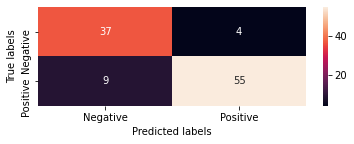

In [15]:
C = [0.001, 0.01, 0.1, 1, 10, 100]
params = {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : C,
    'classifier__solver' : ['liblinear']}
pipe = Pipeline([('classifier' , LogisticRegression())])
kf = SKFold(n_splits=5)      # K = 5
logreg = GridSearchCV(estimator=pipe,
                       param_grid=params,
                       scoring=['roc_auc'],
                       cv= kf, refit='roc_auc', verbose=3, return_train_score=True)
for train_idx, val_idx in kf.split(X_train, y_train):
    x_train, x_val = X_train[train_idx], X_train[val_idx]
    y_train1, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    logreg.fit(x_train, y_train1)
    y_pred = logreg.predict_proba(x_val)

best_logreg = logreg.best_estimator_

y_pred_logreg =  best_logreg.predict(X_test)
y_pred_proba_logreg = best_logreg.predict_proba(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_logreg)
ax1 = plt.subplot(211)
sns.heatmap(cnf_matrix, annot=True, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

Report the evaluation metrics of the train and test sets:

In [16]:
print('For the train set:\n')
f.calc_stat(X_train,y_train,best_logreg)
print('For the test set:\n')
f.calc_stat(X_test,y_test,best_logreg)

For the train set:

Loss is 0.17. 
Accuracy is 0.93. 
F1 is 0.94. 
AUROC is 0.983
For the test set:

Loss is 0.26. 
Accuracy is 0.88. 
F1 is 0.89. 
AUROC is 0.955


Another linear classifier is SVM with linear kernel:

In [17]:
# C = [0.001, 0.01, 0.1, 1, 10, 100]
C = [100, 1000]
gamma = [100, 1]
y_pred_svm_lin, svm_lin = f.cv_kfold_svm(X_train,y_train,C=C,K=5,gamma=gamma,flag = 'linear')
best_svm_lin = svm_lin.best_estimator_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.991, test=0.922), total=   0.1s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.970, test=0.980), total=   0.1s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.977, test=0.942), total=   0.1s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.972, test=0.986), total=   0.3s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.983, test=0.974), total=   0.1s
[CV] svm__C=100, svm__gamma=1, svm__kernel=linear ....................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=linear, roc_auc=(train=0.991, test=0.922), total=   0.1s
[CV] svm__C=100, svm__gamma=1, svm__kernel=linear ....................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=linear, roc_auc=(train=0.970, test=0.980), total=   0.1s
[CV] svm__C=100, svm__gamma=1, svm__kernel=linear ....................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=linear, roc_auc=(train=0.977, test=0.942), total=   0.1s
[CV] svm__C=100, svm__gamma=1, svm__kernel=linear ....................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=linear, roc_auc=(train=0.972, test=0.986), total=   0.3s
[CV] svm__C=100, svm__gamma=1, svm_

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   23.9s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.993, test=0.982), total=   0.0s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.987, test=0.994), total=   0.1s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.993, test=0.938), total=   0.0s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.991, test=0.993), total=   0.1s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.992, test=0.935), total=   0.0s
[CV] svm__C=100, svm__gamma=1, svm__kernel=linear ....................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=linear, roc_auc=(train=0.993, test=0.982), total=   0.0s
[CV] svm__C=100, svm__gamma=1, svm__kernel=linear ....................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=linear, roc_auc=(train=0.987, test=0.994), total=   0.1s
[CV] svm__C=100, svm__gamma=1, svm__kernel=linear ....................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=linear, roc_auc=(train=0.993, test=0.938), total=   0.0s
[CV] svm__C=100, svm__gamma=1, svm__kernel=linear ....................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=linear, roc_auc=(train=0.991, test=0.993), total=   0.1s
[CV] svm__C=100, svm__gamma=1, svm_

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    6.2s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.982, test=0.973), total=   0.1s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.989, test=0.950), total=   0.1s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.984, test=0.961), total=   0.1s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.975, test=0.985), total=   0.1s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.984, test=0.966), total=   0.1s
[CV] svm__C=100, svm__gamma=1, svm__kernel=linear ....................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=linear, roc_auc=(train=0.982, test=0.973), total=   0.1s
[CV] svm__C=100, svm__gamma=1, svm__kernel=linear ....................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=linear, roc_auc=(train=0.989, test=0.950), total=   0.1s
[CV] svm__C=100, svm__gamma=1, svm__kernel=linear ....................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=linear, roc_auc=(train=0.984, test=0.961), total=   0.1s
[CV] svm__C=100, svm__gamma=1, sv

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   17.7s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.975, test=0.982), total=   0.1s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.989, test=0.940), total=   0.1s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.979, test=0.972), total=   0.1s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.980, test=0.961), total=   0.1s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.982, test=0.964), total=   0.1s
[CV] svm__C=100, svm__gamma=1, svm__kernel=linear ....................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=linear, roc_auc=(train=0.975, test=0.982), total=   0.2s
[CV] svm__C=100, svm__gamma=1, svm__kernel=linear ....................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=linear, roc_auc=(train=0.989, test=0.940), total=   0.1s
[CV] svm__C=100, svm__gamma=1, svm__kernel=linear ....................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=linear, roc_auc=(train=0.979, test=0.972), total=   0.3s
[CV] svm__C=100, svm__gamma=1, sv

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   18.5s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.979, test=0.993), total=   0.2s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.987, test=0.911), total=   0.1s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.980, test=0.951), total=   0.1s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.984, test=0.929), total=   0.1s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.983, test=0.982), total=   0.1s
[CV] svm__C=100, svm__gamma=1, svm__kernel=linear ....................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=linear, roc_auc=(train=0.979, test=0.993), total=   0.1s
[CV] svm__C=100, svm__gamma=1, svm__kernel=linear ....................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=linear, roc_auc=(train=0.987, test=0.911), total=   0.0s
[CV] svm__C=100, svm__gamma=1, svm__kernel=linear ....................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=linear, roc_auc=(train=0.980, test=0.951), total=   0.1s
[CV] svm__C=100, svm__gamma=1, svm__kernel=linear ....................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=linear, roc_auc=(train=0.984, test=0.929), total=   0.1s
[CV] svm__C=100, svm__gamma=1, svm_

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   17.8s finished


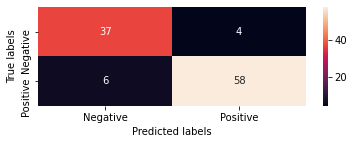

In [18]:
y_pred_svm_lin_best =  best_svm_lin.predict(X_test)
y_pred_proba_svm_lin_best = best_svm_lin.predict_proba(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svm_lin_best)
ax1 = plt.subplot(211)
sns.heatmap(cnf_matrix, annot=True, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()


In [19]:
W = svm_lin.best_estimator_.named_steps
print('For the train set:\n')
f.calc_stat(X_train,y_train,best_svm_lin,W=W)
print('For the test set:\n')
f.calc_stat(X_test,y_test,best_svm_lin,W=W)

For the train set:

Loss is 0.20. 
Accuracy is 0.92. 
F1 is 0.93. 
AUROC is 0.981
For the test set:

Loss is 0.29. 
Accuracy is 0.90. 
F1 is 0.92. 
AUROC is 0.948


Non-linear classifiers. First of all SVM with kernel rbf.

In [20]:
C = [10, 100]
gamma = [0.1, 1]
y_pred_svm_rbf, svm_rbf = f.cv_kfold_svm(X_train,y_train,C=C,K=5,gamma=gamma, flag = 'rbf')
best_svm_rbf = svm_rbf.best_estimator_
W = svm_rbf.best_estimator_.named_steps


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=rbf ......................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=1.000, test=0.991), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=rbf ......................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=1.000, test=0.991), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=rbf ......................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=1.000, test=0.999), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=rbf ......................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=1.000, test=1.000), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=rbf ......................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=1.000, test=0.997), total=   0.0s
[CV] svm__C=10, svm__gamma=1, svm__kernel=rbf ........................
[CV]  svm__C=10, sv

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=100, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=1.000, test=1.000), total=   0.0s
[CV] svm__C=100, svm__gamma=0.1, svm__kernel=rbf .....................
[CV]  svm__C=100, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=1.000, test=0.999), total=   0.0s
[CV] svm__C=100, svm__gamma=1, svm__kernel=rbf .......................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=rbf, roc_auc=(train=1.000, test=0.988), total=   0.0s
[CV] svm__C=100, svm__gamma=1, svm__kernel=rbf .......................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=rbf, roc_auc=(train=1.000, test=0.988), total=   0.0s
[CV] svm__C=100, svm__gamma=1, svm__kernel=rbf .......................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=rbf, roc_auc=(train=1.000, test=1.000), total=   0.0s
[CV] svm__C=100, svm__gamma=1, svm__kernel=rbf .......................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=rbf, roc_auc=(train=1.000, test=1.000), total=   0.0s
[CV] svm__C=100, svm__gamma=1, svm__kernel=rbf ......

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=10, svm__gamma=1, svm__kernel=rbf, roc_auc=(train=1.000, test=0.974), total=   0.0s
[CV] svm__C=10, svm__gamma=1, svm__kernel=rbf ........................
[CV]  svm__C=10, svm__gamma=1, svm__kernel=rbf, roc_auc=(train=1.000, test=1.000), total=   0.0s
[CV] svm__C=10, svm__gamma=1, svm__kernel=rbf ........................
[CV]  svm__C=10, svm__gamma=1, svm__kernel=rbf, roc_auc=(train=1.000, test=0.998), total=   0.0s
[CV] svm__C=10, svm__gamma=1, svm__kernel=rbf ........................
[CV]  svm__C=10, svm__gamma=1, svm__kernel=rbf, roc_auc=(train=1.000, test=1.000), total=   0.0s
[CV] svm__C=10, svm__gamma=1, svm__kernel=rbf ........................
[CV]  svm__C=10, svm__gamma=1, svm__kernel=rbf, roc_auc=(train=1.000, test=0.989), total=   0.0s
[CV] svm__C=100, svm__gamma=0.1, svm__kernel=rbf .....................
[CV]  svm__C=100, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=1.000, test=0.992), total=   0.0s
[CV] svm__C=100, svm__gamma=0.1, svm__kernel=rbf ...........

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=100, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=1.000, test=1.000), total=   0.0s
[CV] svm__C=100, svm__gamma=0.1, svm__kernel=rbf .....................
[CV]  svm__C=100, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=1.000, test=0.995), total=   0.0s
[CV] svm__C=100, svm__gamma=1, svm__kernel=rbf .......................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=rbf, roc_auc=(train=1.000, test=0.973), total=   0.0s
[CV] svm__C=100, svm__gamma=1, svm__kernel=rbf .......................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=rbf, roc_auc=(train=1.000, test=0.994), total=   0.0s
[CV] svm__C=100, svm__gamma=1, svm__kernel=rbf .......................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=rbf, roc_auc=(train=1.000, test=0.989), total=   0.0s
[CV] svm__C=100, svm__gamma=1, svm__kernel=rbf .......................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=rbf, roc_auc=(train=1.000, test=1.000), total=   0.0s
[CV] svm__C=100, svm__gamma=1, svm__kernel=rbf ......

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=10, svm__gamma=1, svm__kernel=rbf, roc_auc=(train=1.000, test=0.985), total=   0.0s
[CV] svm__C=10, svm__gamma=1, svm__kernel=rbf ........................
[CV]  svm__C=10, svm__gamma=1, svm__kernel=rbf, roc_auc=(train=1.000, test=0.964), total=   0.0s
[CV] svm__C=10, svm__gamma=1, svm__kernel=rbf ........................
[CV]  svm__C=10, svm__gamma=1, svm__kernel=rbf, roc_auc=(train=1.000, test=1.000), total=   0.0s
[CV] svm__C=10, svm__gamma=1, svm__kernel=rbf ........................
[CV]  svm__C=10, svm__gamma=1, svm__kernel=rbf, roc_auc=(train=1.000, test=0.993), total=   0.0s
[CV] svm__C=100, svm__gamma=0.1, svm__kernel=rbf .....................
[CV]  svm__C=100, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=1.000, test=0.994), total=   0.0s
[CV] svm__C=100, svm__gamma=0.1, svm__kernel=rbf .....................
[CV]  svm__C=100, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=1.000, test=0.992), total=   0.0s
[CV] svm__C=100, svm__gamma=0.1, svm__kernel=rbf ........

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=100, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=1.000, test=0.991), total=   0.0s
[CV] svm__C=100, svm__gamma=0.1, svm__kernel=rbf .....................
[CV]  svm__C=100, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=1.000, test=0.991), total=   0.0s
[CV] svm__C=100, svm__gamma=0.1, svm__kernel=rbf .....................
[CV]  svm__C=100, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=1.000, test=1.000), total=   0.0s
[CV] svm__C=100, svm__gamma=0.1, svm__kernel=rbf .....................
[CV]  svm__C=100, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=1.000, test=1.000), total=   0.0s
[CV] svm__C=100, svm__gamma=1, svm__kernel=rbf .......................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=rbf, roc_auc=(train=1.000, test=1.000), total=   0.0s
[CV] svm__C=100, svm__gamma=1, svm__kernel=rbf .......................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=rbf, roc_auc=(train=1.000, test=0.982), total=   0.0s
[CV] svm__C=100, svm__gamma=1, svm__kernel=rbf ..

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished


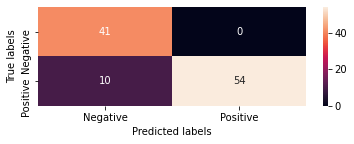

In [21]:
y_pred_svm_rbf_best =  best_svm_rbf.predict(X_test)
y_pred_proba_svm_rbf_best = best_svm_rbf.predict_proba(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svm_rbf_best)
ax1 = plt.subplot(211)
sns.heatmap(cnf_matrix, annot=True, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

In [22]:
print('For the train set:\n')
f.calc_stat(X_train,y_train,best_svm_rbf, W=W)
print('For the test set:\n')
f.calc_stat(X_test,y_test,best_svm_rbf,W=W)

For the train set:

Loss is 0.03. 
Accuracy is 0.99. 
F1 is 0.99. 
AUROC is 0.998
For the test set:

Loss is 0.21. 
Accuracy is 0.90. 
F1 is 0.92. 
AUROC is 0.989


Non-linear classifier - SVM with kernel poly.

In [23]:
C = [10, 100]
gamma = [0.1, 1]
y_pred_svm_poly, svm_poly = f.cv_kfold_svm(X_train,y_train,C=C,K=5,gamma=gamma, flag = 'poly')
best_svm_poly = svm_poly.best_estimator_
W = best_svm_poly.named_steps

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=poly .....................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=poly, roc_auc=(train=1.000, test=0.984), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=poly .....................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=poly, roc_auc=(train=1.000, test=0.985), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=poly .....................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=poly, roc_auc=(train=1.000, test=0.999), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=poly .....................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=poly, roc_auc=(train=1.000, test=1.000), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=poly .....................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=poly, roc_auc=(train=1.000, test=0.998), total=   0.0s
[CV] svm__C=10, svm__gamma=1, svm__kernel=poly .......................
[CV]  svm__C=1

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished


[CV]  svm__C=100, svm__gamma=1, svm__kernel=poly, roc_auc=(train=1.000, test=0.996), total=   0.0s
[CV] svm__C=100, svm__gamma=1, svm__kernel=poly ......................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=poly, roc_auc=(train=1.000, test=0.992), total=   0.0s
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=poly .....................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=poly, roc_auc=(train=1.000, test=0.993), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=poly .....................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=poly, roc_auc=(train=1.000, test=0.999), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=poly .....................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=poly, roc_auc=(train=1.000, test=1.000), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=poly .....................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=poly, roc_auc=(train=1.000, test=1.000), t

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=poly, roc_auc=(train=1.000, test=0.994), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=poly .....................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=poly, roc_auc=(train=1.000, test=0.991), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=poly .....................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=poly, roc_auc=(train=1.000, test=1.000), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=poly .....................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=poly, roc_auc=(train=1.000, test=0.987), total=   0.0s
[CV] svm__C=10, svm__gamma=1, svm__kernel=poly .......................
[CV]  svm__C=10, svm__gamma=1, svm__kernel=poly, roc_auc=(train=1.000, test=0.958), total=   0.0s
[CV] svm__C=10, svm__gamma=1, svm__kernel=poly .......................
[CV]  svm__C=10, svm__gamma=1, svm__kernel=poly, roc_auc=(train=1.000, test=0.954), total=   0.0s
[CV] svm__C=10, svm__gamma=1, svm__kernel=poly ..

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=poly, roc_auc=(train=1.000, test=0.981), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=poly .....................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=poly, roc_auc=(train=1.000, test=1.000), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=poly .....................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=poly, roc_auc=(train=1.000, test=0.990), total=   0.0s
[CV] svm__C=10, svm__gamma=1, svm__kernel=poly .......................
[CV]  svm__C=10, svm__gamma=1, svm__kernel=poly, roc_auc=(train=1.000, test=0.961), total=   0.0s
[CV] svm__C=10, svm__gamma=1, svm__kernel=poly .......................
[CV]  svm__C=10, svm__gamma=1, svm__kernel=poly, roc_auc=(train=1.000, test=0.958), total=   0.0s
[CV] svm__C=10, svm__gamma=1, svm__kernel=poly .......................
[CV]  svm__C=10, svm__gamma=1, svm__kernel=poly, roc_auc=(train=1.000, test=0.947), total=   0.0s
[CV] svm__C=10, svm__gamma=1, svm__kernel=poly ....

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished


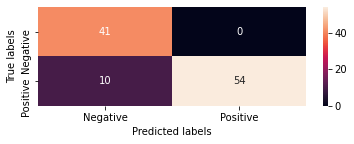

In [24]:
y_pred_svm_poly_best =  best_svm_poly.predict(X_test)
y_pred_proba_svm_poly_best = best_svm_poly.predict_proba(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svm_poly_best)
ax1 = plt.subplot(211)
sns.heatmap(cnf_matrix, annot=True, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

In [25]:
print('For the train set:\n')
f.calc_stat(X_train,y_train,best_svm_poly,W=W)
print('For the test set:\n')
f.calc_stat(X_test,y_test,best_svm_poly,W=W)

For the train set:

Loss is 0.03. 
Accuracy is 0.99. 
F1 is 0.99. 
AUROC is 1.000
For the test set:

Loss is 0.19. 
Accuracy is 0.90. 
F1 is 0.92. 
AUROC is 0.997


Random Forest to chose the best 2 features:

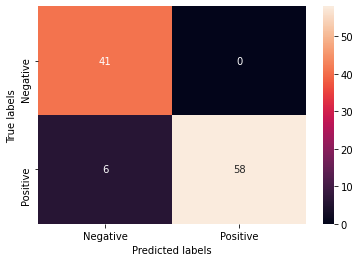

Accuracy is: 94.29%
F1 score is: 94.13%
AUC is:  99.16%


In [26]:
clf = rfc(n_estimators=10)
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Diagnosis'],axis=1), np.ravel(diag_state), test_size=0.2, random_state=10, stratify = np.ravel(diag_state) )
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba_test = clf.predict_proba(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cnf_matrix, annot=True, xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
ax.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred))) + "%")
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred, average='macro'))) + "%")
print('AUC is:  ' + str("{0:.02f}".format(100*roc_auc_score(y_test, y_pred_proba_test[:, 1]))) + '%')

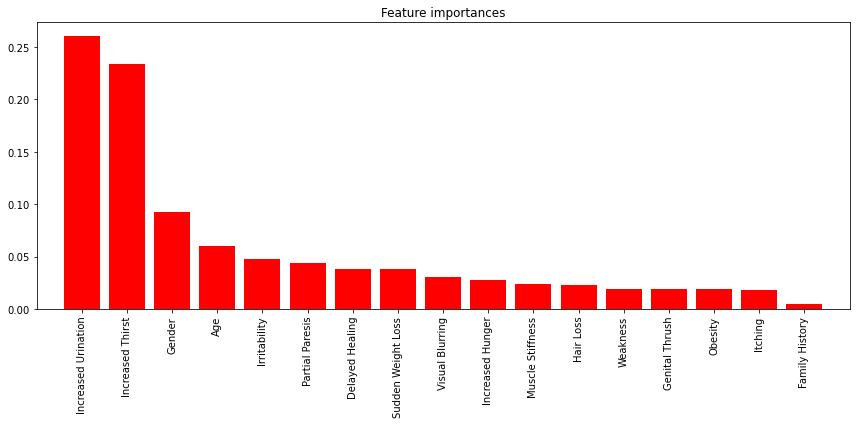

In [27]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", align="center")
o = np.zeros(len(orig_feat)).tolist()
for i,val in enumerate(indices):
    o[i] = orig_feat[val]
plt.xticks(range(X_train.shape[1]), o)
plt.xlim([-1, X_train.shape[1]])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

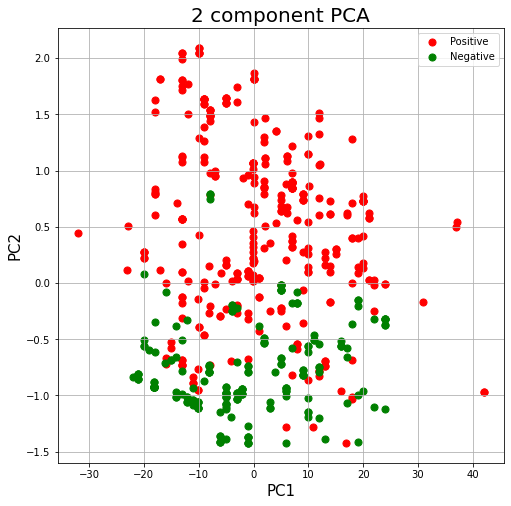

In [29]:
pca = PCA(n_components=2)
pca.fit(data.drop(['Diagnosis'],axis=1))
transform_data = pca.transform(data.drop(['Diagnosis'],axis=1))
PC = pca.fit_transform(data.drop(['Diagnosis'],axis=1))
pdf = pd.DataFrame(data = PC
             , columns = ['PC1', 'PC2'])
df_ = pd.concat([pdf, data[['Diagnosis']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df_['Diagnosis'] == target
    ax.scatter(df_.loc[indicesToKeep, 'PC1']
               , df_.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(['Positive','Negative'])
ax.grid()


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X2, d["Diagnosis"], test_size=0.2, random_state=42,stratify = d["Diagnosis"])
log_reg = LogisticRegression()
pca = PCA(n_components=2)

pipe_pca_logreg = Pipeline(steps=[('pca', pca), ('logistic', log_reg)])
pipe_pca_logreg.fit(X_train, y_train)
y_pred_pca = pipe_pca_logreg.predict(X_test)
f.calc_stat(X_test,y_test,pipe_pca_logreg)


Loss is 0.25. 
Accuracy is 0.87. 
F1 is 0.89. 
AUROC is 0.958


In [31]:
svm_lin = svm.SVC(probability=True,gamma='auto',kernel = 'linear')
pca = PCA(n_components=2)
pipe_pca_svm_lin = Pipeline(steps=[('pca', pca), ('svm', svm_lin)])
pipe_pca_svm_lin.fit(X_train, y_train)
y_pred_pca = pipe_pca_svm_lin.predict(X_test)
f.calc_stat(X_test,y_test,pipe_pca_svm_lin)

Loss is 0.24. 
Accuracy is 0.90. 
F1 is 0.92. 
AUROC is 0.956


In [32]:
svm_rbf = svm.SVC(probability=True,gamma='auto',kernel = 'rbf')
pca = PCA(n_components=2)
pipe_pca_svm_rbf = Pipeline(steps=[('pca', pca), ('svm', svm_rbf)])
pipe_pca_svm_rbf.fit(X_train, y_train)
y_pred_pca = pipe_pca_svm_rbf.predict(X_test)
f.calc_stat(X_test,y_test,pipe_pca_svm_rbf)

Loss is 0.24. 
Accuracy is 0.90. 
F1 is 0.91. 
AUROC is 0.957


In [33]:
svm_poly = svm.SVC(probability=True,gamma='auto',kernel = 'poly')
pca = PCA(n_components=2)
pipe_pca_svm_poly = Pipeline(steps=[('pca', pca), ('svm', svm_poly)])
pipe_pca_svm_poly.fit(X_train, y_train)
y_pred_pca = pipe_pca_svm_poly.predict(X_test)
f.calc_stat(X_test,y_test,pipe_pca_svm_poly)

Loss is 0.25. 
Accuracy is 0.90. 
F1 is 0.91. 
AUROC is 0.972


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear, roc_auc=(train=0.500, test=0.500), total=   0.0s
[CV] classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear, roc_auc=(train=0.500, test=0.500), total=   0.0s
[CV] classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear, roc_auc=(train=0.500, test=0.500), total=   0.0s
[CV] classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  classifier=LogisticRegression(), classifier__C=100, classifier__penalty=l1, classifier__solver=liblinear, roc_auc=(train=0.895, test=0.930), total=   0.0s
[CV] classifier=LogisticRegression(), classifier__C=100, classifier__penalty=l1, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(), classifier__C=100, classifier__penalty=l1, classifier__solver=liblinear, roc_auc=(train=0.903, test=0.894), total=   0.0s
[CV] classifier=LogisticRegression(), classifier__C=100, classifier__penalty=l1, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(), classifier__C=100, classifier__penalty=l1, classifier__solver=liblinear, roc_auc=(train=0.916, test=0.864), total=   0.0s
[CV] classifier=LogisticRegression(), classifier__C=100, classifier__penalty=l1, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(), classifier__C=100, classifier__penalty=l1, classifier__solver=liblinear, roc_auc=(train=0.898, test=0.940), total=   0.0s
[CV] classifier=Logisti

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  classifier=LogisticRegression(C=0.001, solver='liblinear'), classifier__C=10, classifier__penalty=l2, classifier__solver=liblinear, roc_auc=(train=0.916, test=0.885), total=   0.0s
[CV] classifier=LogisticRegression(C=0.001, solver='liblinear'), classifier__C=10, classifier__penalty=l2, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(C=0.001, solver='liblinear'), classifier__C=10, classifier__penalty=l2, classifier__solver=liblinear, roc_auc=(train=0.903, test=0.943), total=   0.0s
[CV] classifier=LogisticRegression(C=0.001, solver='liblinear'), classifier__C=10, classifier__penalty=l2, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(C=0.001, solver='liblinear'), classifier__C=10, classifier__penalty=l2, classifier__solver=liblinear, roc_auc=(train=0.913, test=0.894), total=   0.0s
[CV] classifier=LogisticRegression(C=0.001, solver='liblinear'), classifier__C=10, classifier__penalty=l2, classifier__solver=liblinear 
[CV]  classifier=LogisticReg

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  classifier=LogisticRegression(C=0.001, solver='liblinear'), classifier__C=1, classifier__penalty=l2, classifier__solver=liblinear, roc_auc=(train=0.907, test=0.874), total=   0.0s
[CV] classifier=LogisticRegression(C=0.001, solver='liblinear'), classifier__C=1, classifier__penalty=l2, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(C=0.001, solver='liblinear'), classifier__C=1, classifier__penalty=l2, classifier__solver=liblinear, roc_auc=(train=0.898, test=0.912), total=   0.0s
[CV] classifier=LogisticRegression(C=0.001, solver='liblinear'), classifier__C=1, classifier__penalty=l2, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(C=0.001, solver='liblinear'), classifier__C=1, classifier__penalty=l2, classifier__solver=liblinear, roc_auc=(train=0.907, test=0.864), total=   0.0s
[CV] classifier=LogisticRegression(C=0.001, solver='liblinear'), classifier__C=1, classifier__penalty=l2, classifier__solver=liblinear 
[CV]  classifier=LogisticRegressio

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  classifier=LogisticRegression(C=1, penalty='l1', solver='liblinear'), classifier__C=0.1, classifier__penalty=l2, classifier__solver=liblinear, roc_auc=(train=0.911, test=0.899), total=   0.0s
[CV] classifier=LogisticRegression(C=1, penalty='l1', solver='liblinear'), classifier__C=0.1, classifier__penalty=l2, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(C=1, penalty='l1', solver='liblinear'), classifier__C=0.1, classifier__penalty=l2, classifier__solver=liblinear, roc_auc=(train=0.902, test=0.932), total=   0.0s
[CV] classifier=LogisticRegression(C=1, penalty='l1', solver='liblinear'), classifier__C=0.1, classifier__penalty=l2, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(C=1, penalty='l1', solver='liblinear'), classifier__C=0.1, classifier__penalty=l2, classifier__solver=liblinear, roc_auc=(train=0.910, test=0.899), total=   0.0s
[CV] classifier=LogisticRegression(C=1, penalty='l1', solver='liblinear'), classifier__C=0.1, classifier__pena

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  classifier=LogisticRegression(C=0.001, solver='liblinear'), classifier__C=0.001, classifier__penalty=l2, classifier__solver=liblinear, roc_auc=(train=0.898, test=0.899), total=   0.0s
[CV] classifier=LogisticRegression(C=0.001, solver='liblinear'), classifier__C=0.001, classifier__penalty=l2, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(C=0.001, solver='liblinear'), classifier__C=0.001, classifier__penalty=l2, classifier__solver=liblinear, roc_auc=(train=0.888, test=0.932), total=   0.0s
[CV] classifier=LogisticRegression(C=0.001, solver='liblinear'), classifier__C=0.001, classifier__penalty=l2, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(C=0.001, solver='liblinear'), classifier__C=0.001, classifier__penalty=l2, classifier__solver=liblinear, roc_auc=(train=0.899, test=0.893), total=   0.0s
[CV] classifier=LogisticRegression(C=0.001, solver='liblinear'), classifier__C=0.001, classifier__penalty=l2, classifier__solver=liblinear 
[CV]  clas

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished


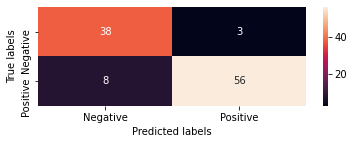

Loss is 0.66. 
Accuracy is 0.90. 
F1 is 0.91. 
AUROC is 0.918


In [41]:
X3 = dataset.dropna()[['Increased Urination', 'Increased Thirst']]
X3n = pd.get_dummies(X3)
X_train, X_test, y_train, y_test = train_test_split(X3n.values, d['Diagnosis'], test_size=0.2, random_state=42,stratify = d['Diagnosis'])
C = [0.001, 0.01, 0.1, 1, 10, 100]
_,logreg = f.cv_kfold_logreg(X_train,y_train,C,K=5)
best_logreg_2feat = logreg.best_estimator_
y_pred_logreg =  best_logreg_2feat.predict(X_test)
y_pred_proba_logreg = best_logreg_2feat.predict_proba(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_logreg)
ax1 = plt.subplot(211)
sns.heatmap(cnf_matrix, annot=True, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()
f.calc_stat(X_test,y_test,best_logreg_2feat)

In [35]:
C = [10, 100]
gamma = [1, 100]
y_pred_svm_lin, svm_lin = f.cv_kfold_svm(X_train,y_train,C=C,K=5,gamma=gamma,flag = 'linear')
best_svm_lin = svm_lin.best_estimator_
W = best_svm_lin.named_steps

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] svm__C=10, svm__gamma=1, svm__kernel=linear .....................
[CV]  svm__C=10, svm__gamma=1, svm__kernel=linear, roc_auc=(train=0.913, test=0.865), total=   0.0s
[CV] svm__C=10, svm__gamma=1, svm__kernel=linear .....................
[CV]  svm__C=10, svm__gamma=1, svm__kernel=linear, roc_auc=(train=0.896, test=0.935), total=   0.0s
[CV] svm__C=10, svm__gamma=1, svm__kernel=linear .....................
[CV]  svm__C=10, svm__gamma=1, svm__kernel=linear, roc_auc=(train=0.904, test=0.903), total=   0.0s
[CV] svm__C=10, svm__gamma=1, svm__kernel=linear .....................
[CV]  svm__C=10, svm__gamma=1, svm__kernel=linear, roc_auc=(train=0.911, test=0.874), total=   0.0s
[CV] svm__C=10, svm__gamma=1, svm__kernel=linear .....................
[CV]  svm__C=10, svm__gamma=1, svm__kernel=linear, roc_auc=(train=0.894, test=0.942), total=   0.0s
[CV] svm__C=10, svm__gamma=100, svm__kernel=linear ...................
[CV]  svm__C=1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=100, svm__gamma=1, svm__kernel=linear, roc_auc=(train=0.911, test=0.874), total=   0.0s
[CV] svm__C=100, svm__gamma=1, svm__kernel=linear ....................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=linear, roc_auc=(train=0.894, test=0.942), total=   0.0s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.913, test=0.865), total=   0.0s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.896, test=0.935), total=   0.0s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.904, test=0.903), total=   0.0s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.911, test=0.874), total=   0.0s
[CV] svm__C=100, svm__gamma=100

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.917, test=0.883), total=   0.0s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.901, test=0.948), total=   0.0s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.912, test=0.903), total=   0.0s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.919, test=0.874), total=   0.0s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.903, test=0.942), total=   0.0s
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] svm__C=10, svm__gamma=1, svm__kernel=linear .....................
[CV]  svm__C=10, svm__gamma=1, svm__kernel=linear, roc_auc=(train=0.90

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=100, svm__gamma=1, svm__kernel=linear, roc_auc=(train=0.897, test=0.911), total=   0.0s
[CV] svm__C=100, svm__gamma=1, svm__kernel=linear ....................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=linear, roc_auc=(train=0.906, test=0.874), total=   0.0s
[CV] svm__C=100, svm__gamma=1, svm__kernel=linear ....................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=linear, roc_auc=(train=0.890, test=0.942), total=   0.0s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.903, test=0.886), total=   0.0s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.903, test=0.886), total=   0.0s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.897, test=0.911), total=   0.0s
[CV] svm__C=100, svm__gamma=100, 

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.910, test=0.886), total=   0.0s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.899, test=0.932), total=   0.0s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.909, test=0.887), total=   0.0s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.899, test=0.938), total=   0.0s
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] svm__C=10, svm__gamma=1, svm__kernel=linear .....................
[CV]  svm__C=10, svm__gamma=1, svm__kernel=linear, roc_auc=(train=0.897, test=0.886), total=   0.0s
[CV] svm__C=10, svm__gamma=1, svm__kernel=linear .....................
[CV]  svm__C=10, svm__gamma=1, svm__kernel=linear, roc_auc=(train=0.898, 

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=100, svm__gamma=1, svm__kernel=linear, roc_auc=(train=0.885, test=0.932), total=   0.0s
[CV] svm__C=100, svm__gamma=1, svm__kernel=linear ....................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=linear, roc_auc=(train=0.897, test=0.883), total=   0.0s
[CV] svm__C=100, svm__gamma=1, svm__kernel=linear ....................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=linear, roc_auc=(train=0.899, test=0.883), total=   0.0s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.897, test=0.886), total=   0.0s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.898, test=0.886), total=   0.0s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, roc_auc=(train=0.885, test=0.932), total=   0.0s
[CV] svm__C=100, svm__gamma=100, 

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


In [36]:
f.calc_stat(X_test,y_test,best_svm_lin,W=W)

Loss is 0.29. 
Accuracy is 0.90. 
F1 is 0.91. 
AUROC is 0.924


In [37]:
C = [10, 100]
gamma = [0.1, 1]
y_pred_svm_rbf, svm_rbf = f.cv_kfold_svm(X_train,y_train,C=C,K=5,gamma=gamma,flag = 'rbf')
best_svm_rbf = svm_rbf.best_estimator_
W = best_svm_rbf.named_steps

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=rbf ......................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=0.914, test=0.872), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=rbf ......................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=0.896, test=0.940), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=rbf ......................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=0.904, test=0.913), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=rbf ......................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=0.916, test=0.864), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=rbf ......................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=0.898, test=0.940), total=   0.0s
[CV] svm__C=10, svm__gamma=1, svm__kernel=rbf ........................
[CV]  svm__C=10, sv

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=10, svm__gamma=1, svm__kernel=rbf, roc_auc=(train=0.823, test=0.805), total=   0.0s
[CV] svm__C=10, svm__gamma=1, svm__kernel=rbf ........................
[CV]  svm__C=10, svm__gamma=1, svm__kernel=rbf, roc_auc=(train=0.818, test=0.823), total=   0.0s
[CV] svm__C=100, svm__gamma=0.1, svm__kernel=rbf .....................
[CV]  svm__C=100, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=0.913, test=0.857), total=   0.0s
[CV] svm__C=100, svm__gamma=0.1, svm__kernel=rbf .....................
[CV]  svm__C=100, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=0.895, test=0.930), total=   0.0s
[CV] svm__C=100, svm__gamma=0.1, svm__kernel=rbf .....................
[CV]  svm__C=100, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=0.903, test=0.894), total=   0.0s
[CV] svm__C=100, svm__gamma=0.1, svm__kernel=rbf .....................
[CV]  svm__C=100, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=0.906, test=0.884), total=   0.0s
[CV] svm__C=100, svm__gamma=0.1, svm__kernel=rbf ..

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=100, svm__gamma=1, svm__kernel=rbf, roc_auc=(train=0.891, test=0.944), total=   0.0s
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=rbf ......................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=0.917, test=0.882), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=rbf ......................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=0.899, test=0.954), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=rbf ......................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=0.910, test=0.913), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=rbf ......................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=0.921, test=0.864), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=rbf ......................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=0.903, test=0.940), total=

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=10, svm__gamma=1, svm__kernel=rbf, roc_auc=(train=0.823, test=0.823), total=   0.0s
[CV] svm__C=100, svm__gamma=0.1, svm__kernel=rbf .....................
[CV]  svm__C=100, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=0.903, test=0.887), total=   0.0s
[CV] svm__C=100, svm__gamma=0.1, svm__kernel=rbf .....................
[CV]  svm__C=100, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=0.907, test=0.874), total=   0.0s
[CV] svm__C=100, svm__gamma=0.1, svm__kernel=rbf .....................
[CV]  svm__C=100, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=0.898, test=0.912), total=   0.0s
[CV] svm__C=100, svm__gamma=0.1, svm__kernel=rbf .....................
[CV]  svm__C=100, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=0.905, test=0.884), total=   0.0s
[CV] svm__C=100, svm__gamma=0.1, svm__kernel=rbf .....................
[CV]  svm__C=100, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=0.891, test=0.944), total=   0.0s
[CV] svm__C=100, svm__gamma=1, svm__kernel=rbf .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=100, svm__gamma=1, svm__kernel=rbf, roc_auc=(train=0.907, test=0.874), total=   0.0s
[CV] svm__C=100, svm__gamma=1, svm__kernel=rbf .......................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=rbf, roc_auc=(train=0.898, test=0.912), total=   0.0s
[CV] svm__C=100, svm__gamma=1, svm__kernel=rbf .......................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=rbf, roc_auc=(train=0.905, test=0.884), total=   0.0s
[CV] svm__C=100, svm__gamma=1, svm__kernel=rbf .......................
[CV]  svm__C=100, svm__gamma=1, svm__kernel=rbf, roc_auc=(train=0.891, test=0.944), total=   0.0s
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=rbf ......................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=0.915, test=0.884), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=rbf ......................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=0.911, test=0.899), total=   

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=10, svm__gamma=1, svm__kernel=rbf, roc_auc=(train=0.833, test=0.795), total=   0.0s
[CV] svm__C=100, svm__gamma=0.1, svm__kernel=rbf .....................
[CV]  svm__C=100, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=0.893, test=0.887), total=   0.0s
[CV] svm__C=100, svm__gamma=0.1, svm__kernel=rbf .....................
[CV]  svm__C=100, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=0.897, test=0.874), total=   0.0s
[CV] svm__C=100, svm__gamma=0.1, svm__kernel=rbf .....................
[CV]  svm__C=100, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=0.883, test=0.932), total=   0.0s
[CV] svm__C=100, svm__gamma=0.1, svm__kernel=rbf .....................
[CV]  svm__C=100, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=0.896, test=0.873), total=   0.0s
[CV] svm__C=100, svm__gamma=0.1, svm__kernel=rbf .....................
[CV]  svm__C=100, svm__gamma=0.1, svm__kernel=rbf, roc_auc=(train=0.902, test=0.880), total=   0.0s
[CV] svm__C=100, svm__gamma=1, svm__kernel=rbf .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


In [38]:
f.calc_stat(X_test,y_test,best_svm_rbf,W=W)

Loss is 0.29. 
Accuracy is 0.90. 
F1 is 0.91. 
AUROC is 0.918


In [39]:
C = [100]
gamma = [10]
y_pred_svm_poly, svm_poly = f.cv_kfold_svm(X_train,y_train,C=C,K=5,gamma=gamma,flag = 'poly')
best_svm_poly = svm_poly.best_estimator_
W = best_svm_poly.named_steps

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] svm__C=100, svm__gamma=10, svm__kernel=poly .....................
[CV]  svm__C=100, svm__gamma=10, svm__kernel=poly, roc_auc=(train=0.855, test=0.853), total=   0.0s
[CV] svm__C=100, svm__gamma=10, svm__kernel=poly .....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=100, svm__gamma=10, svm__kernel=poly, roc_auc=(train=0.839, test=0.918), total=   0.0s
[CV] svm__C=100, svm__gamma=10, svm__kernel=poly .....................
[CV]  svm__C=100, svm__gamma=10, svm__kernel=poly, roc_auc=(train=0.859, test=0.846), total=   0.0s
[CV] svm__C=100, svm__gamma=10, svm__kernel=poly .....................
[CV]  svm__C=100, svm__gamma=10, svm__kernel=poly, roc_auc=(train=0.870, test=0.805), total=   0.0s
[CV] svm__C=100, svm__gamma=10, svm__kernel=poly .....................
[CV]  svm__C=100, svm__gamma=10, svm__kernel=poly, roc_auc=(train=0.855, test=0.852), total=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] svm__C=100, svm__gamma=10, svm__kernel=poly .....................
[CV]  svm__C=100, svm__gamma=10, svm__kernel=poly, roc_auc=(train=0.858, test=0.857), total=   0.0s
[CV] svm__C=100, svm__gamma=10, svm__kernel=poly .....................
[CV]  svm__C=100, svm__gamma=10, svm__kernel=poly, roc_auc=(train=0.839, test=0.930), 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remain

[CV]  svm__C=100, svm__gamma=10, svm__kernel=poly, roc_auc=(train=0.845, test=0.859), total=   0.0s
[CV] svm__C=100, svm__gamma=10, svm__kernel=poly .....................
[CV]  svm__C=100, svm__gamma=10, svm__kernel=poly, roc_auc=(train=0.832, test=0.899), total=   0.0s
[CV] svm__C=100, svm__gamma=10, svm__kernel=poly .....................
[CV]  svm__C=100, svm__gamma=10, svm__kernel=poly, roc_auc=(train=0.855, test=0.820), total=   0.0s
[CV] svm__C=100, svm__gamma=10, svm__kernel=poly .....................
[CV]  svm__C=100, svm__gamma=10, svm__kernel=poly, roc_auc=(train=0.858, test=0.805), total=   0.0s
[CV] svm__C=100, svm__gamma=10, svm__kernel=poly .....................
[CV]  svm__C=100, svm__gamma=10, svm__kernel=poly, roc_auc=(train=0.845, test=0.852), total=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] svm__C=100, svm__gamma=10, svm__kernel=poly .....................
[CV]  svm__C=100, svm__gamma=10, svm__kernel=poly, roc_auc=(train=0.881, test=0.859), 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [40]:
f.calc_stat(X_test,y_test,best_svm_poly,W=W)

Loss is 0.32. 
Accuracy is 0.90. 
F1 is 0.91. 
AUROC is 0.872


Theory Questions 

Q1: If we have unbalanced data we can get high accuracy but the other performances will be bad. For example if we have 3% pathology data samples and the classifier always returns healthy label we will get high accuracy (97%) but sensitivity, for example, will be low. 

Q2: If we chose just 2 features we have 2 options:
1) we choose the most correlated features and other not usefull for our classification we will get good performance for predicted labels, and it will be easy for computation

2) if we chose features with bad correlation (it means not usefull for classification) we will get a bad prediction results. But computation will be fast.

If we chose all the features, we have extra information that is not useful for us and make computetions slower, require a large amount of system memory and will affect the performance. 

Q3: we will prfer SVM non-linear, because if we can not distinguish the difference between pancreas biopsies from the human eye the data is not separable linearly. So we do not want to use Logistiq regression and SVM with linear kernel, due to their similarity.

Q4: SVM works well with unstructured and semi-structured data like text and images while logistic regression works with already identified independent variables. The risk of overfitting is less in SVM, while Logistic regression is vulnerable to overfitting. SVM is based on geometrical properties of the data while logistic regression is based on statistical approaches.